# Sensitivity and Complementary Sensitiviy Functions
## today's objectives: 
## - recall  main advantages of feedback
## - derive and understand main feedback equation
## Assume:
## - transfer function representation of a system
## - working knowledge of bode plots

# Why feedback?

- Ability to follow reference signals
- Stability (design)
- Reduction of effects of measurement noise (noise rejection)
- Reduction of effects of process noise / load disturbances (noise rejection, compensation)
- Reduction of effects of model uncertainties
- Efficiency (design)








![openloop](openloop.png "Open-Loop")

- $P$: plant (system)
- $u$: input (variable can be manipulated)
- $y$: output (variable to be controlled)
- $d$: disturbance (affects value of output)

![feedbackloop](feedbackloop.png "Feedback")

- $K$: controller
- $r$: reference signal (desired output)
- $n$: measurement noise (error in measurement)
- $y_m$: measured output
- $\varepsilon$: tracking error (difference between reference and measured output)


Open loop Attabotics example

In [6]:
import control as ct
import numpy as np
import controls_teaching_lecture_utilities

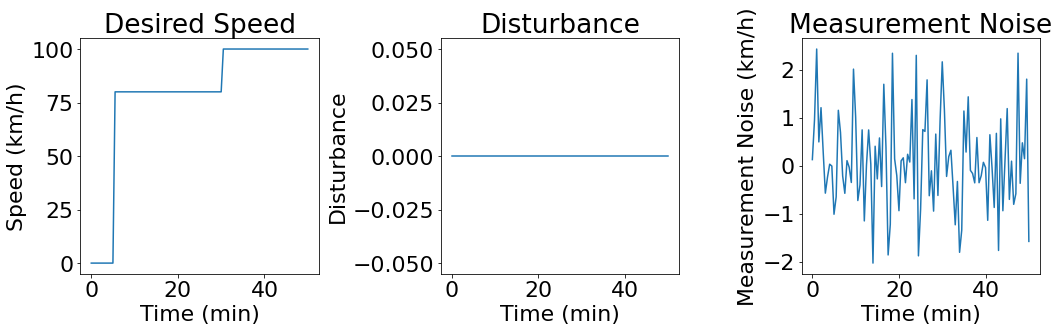

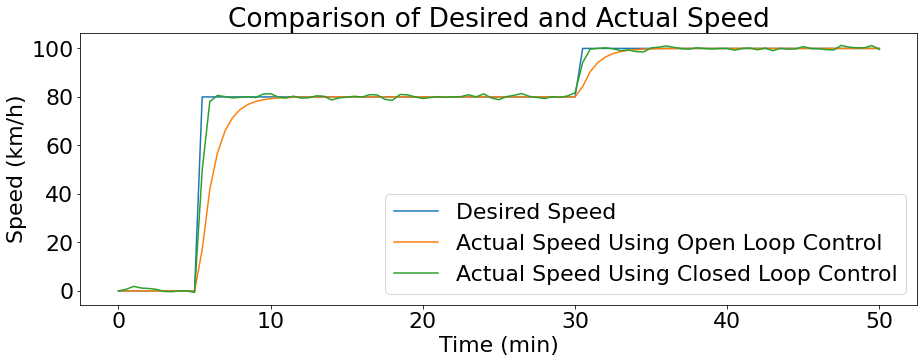

In [14]:
# Very simple model of a car (input = gas pedal, output = speed of car)
s = ct.tf('s')
P = 1/(s+1)

# Controller
K = 5*(s+1)/s

# Reference, disturbance and measurement noise signals
t = np.linspace(0, 50, 101)
r = [0 if ti <= 5 else
     80 if ti <= 30 else
     100 for ti in t]
r = np.array(r)
d = np.zeros(101)
n = np.random.randn(101)

# simulate closed-loop and open-loop models for selected reference, disturbance and measurement noise signals
y_closed_loop = sim_closed_loop(P,K,t,r,d,n)
y_open_loop = sim_open_loop(P,t,r,d)

# plot results
make_plots(r,d,n,y_closed_loop,y_open_loop)






# Effect of disturbance (open-loop vs closed-loop)

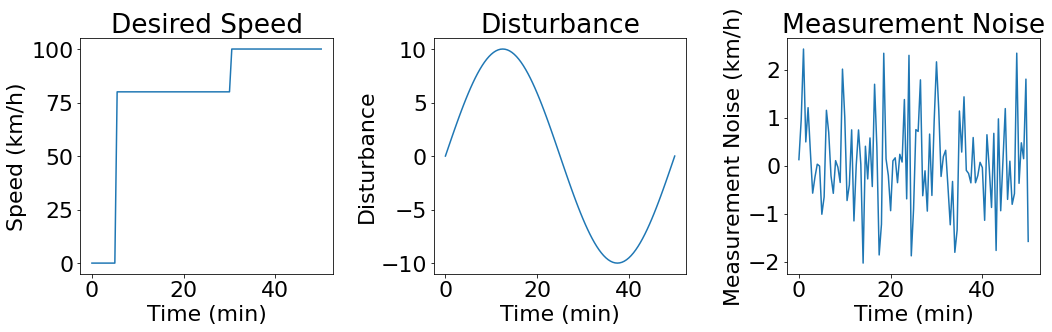

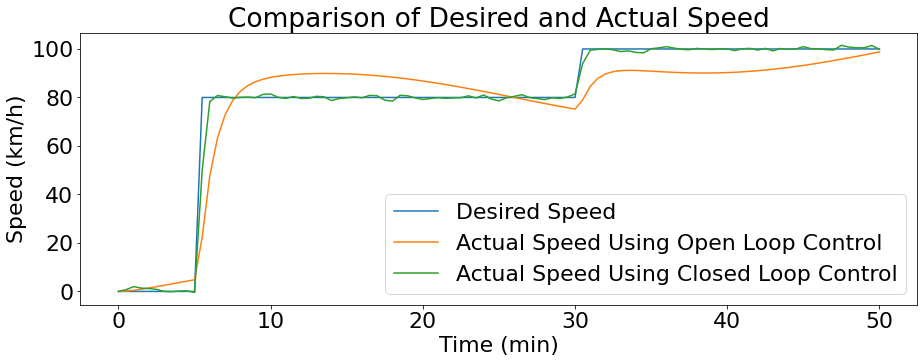

In [15]:
d_hill = 10*np.sin(t/100*np.pi*4)
y_closed_loop = sim_closed_loop(P,K,t,r,d_hill,n)
y_open_loop = sim_open_loop(P,t,r,d_hill)

make_plots(r,d_hill,n,y_closed_loop,y_open_loop)


# Effect of uncertainty in the model (open-loop vs closed-loop)

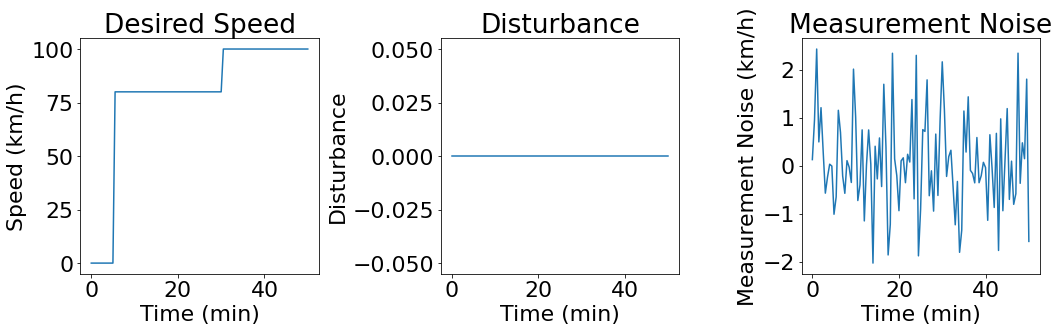

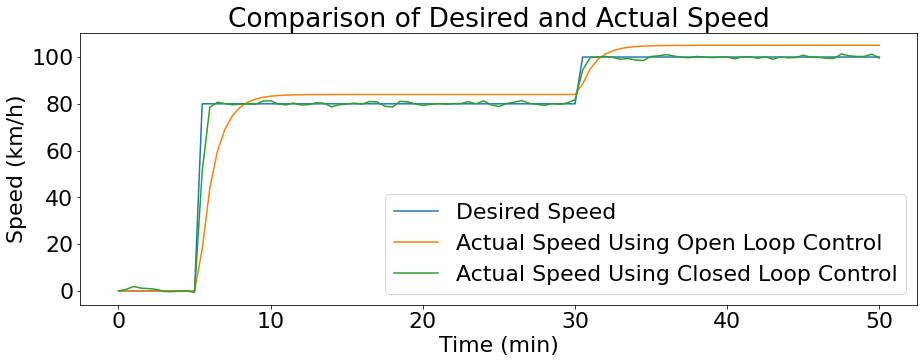

In [16]:
P_changed = 1.05/(s+1)
y_closed_loop = sim_closed_loop(P_changed,K,t,r,d,n)
y_open_loop = sim_open_loop(P_changed,t,r,d)

make_plots(r,d,n,y_closed_loop,y_open_loop)


![feedbackloop](feedbackloop.png "Feedback")

$$
\begin{align}
y(s) &= P(s) \Big( u(s) + d(s) \Big) \\
&= P(s)K(s) \Big( r(s) - y_m(s) \Big ) + P(s)d(s) \\
&= P(s)K(s)r(s) - P(s)K(s)n(s) - P(s)K(s) y(s) + P(s)d(s) \\
&= \frac{P(s)K(s)}{1+P(s)K(s)} r(s) + \frac{P(s)K(s)}{1+P(s)K(s)}n(s) + \frac{P(s)}{1+P(s)K(s)}d(s)
\end{align}
$$

Loop transfer function:

$$L(s) = P(s)K(s)$$

Sensitivity Function:

$$S(s) = \frac{1}{1+P(s)K(s)} = \frac{1}{1 + L}$$ 

Complementary Sensitivity Function:

$$T(s) = \frac{P(s)K(s)}{1+P(s)K(s)} = \frac{L}{1+L}$$ 

Interesting property:

$$S(s) + T(s) = 1$$

Feedback equation becomes:

$$y(s) = T(s)r(s) + T(s)n(s) + S(s)P(s)d(s)$$

In terms of tracking error:

$$
\begin{align}
\varepsilon(s) &= r(s) - y(s) \\
&= r(s) -  T(s)r(s) - T(s)n(s) - S(s)P(s)d(s) \\
&= S(s)r(s) - T(s)n(s) - S(s)P(s)d(s)
\end{align}
$$

Observations:
- $S(s)$ determines the error due to not tracking $r$ 
- $S(s)$ determines the error due to process disturbances $d$
- $T(s)$ determines the error due to measurement noise $n$

# We want both $S(s)$ and $T(s)$ to be small!!
# However recall $S(s) + T(s) = 1$. 


$$y(s) = S(s)r(s) + S(s)n(s) + T(s)P(s)d(s)$$

![FrequencyDomainRepresentationDesiredSensitivity](sensitivityBode.png "Frequency Domain Representation of Desirable Sensitivity Function")

# That is great insight!
# However, how does this help us? Our ''tuning knob'' is the controller K...

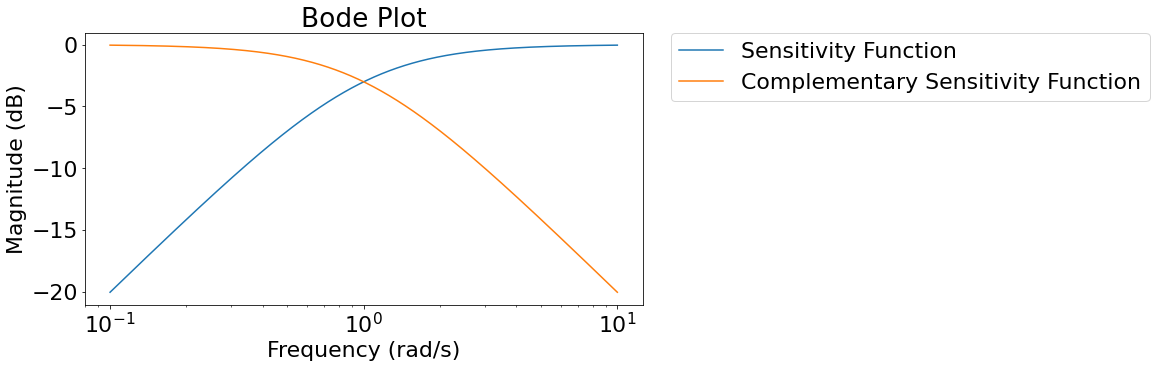

In [11]:
L = 1/s

S = 1/(1+L)
T = L/(1+L)
mag, phase, omega = bode([S, T], dB=True, plot=False)

fig, ax = plt.subplots(1,1, figsize = [10,5])
ax.semilogx(omega[0],[20*math.log10(x) for x in mag[0]], label='Sensitivity Function')
ax.semilogx(omega[1],[20*math.log10(x) for x in mag[1]], label='Complementary Sensitivity Function')
#ax.semilogx(omega[0],mag[0], label='Sensitivity Function')
#ax.semilogx(omega[1],mag[1], label='Complementary Sensitivity Function')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Bode Plot')
plt.legend(bbox_to_anchor=(1.05,1), borderaxespad=0)
plt.show()

# How does $K$ affect frequency response of $S$ and $T$?

$$
\begin{align}
S(s) &= \frac{1}{1+L(s)} \\
T(s) &= \frac{L(s)}{1+L(s)} \\
L(s) &= P(s)K(s)
\end{align}
$$

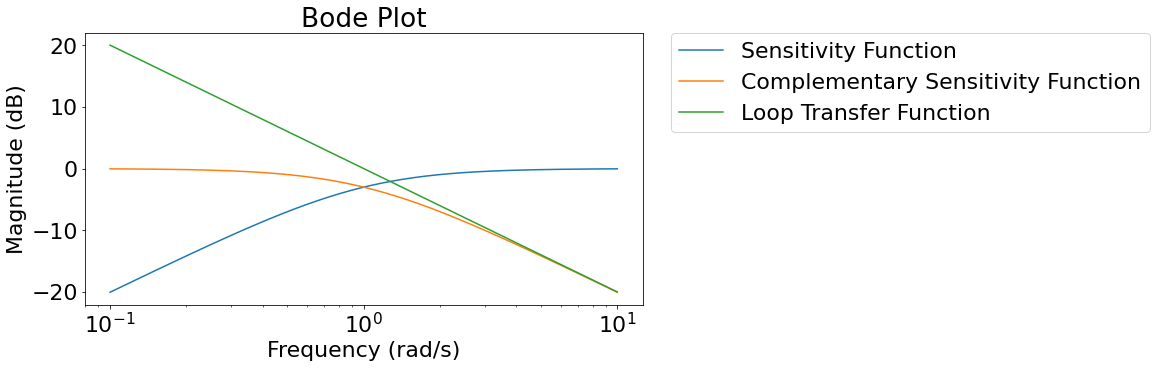

In [13]:
L = 1/s

S = 1/(1+L)
T = L/(1+L)
mag, phase, omega = bode([S, T, L], dB=True, plot=False)



fig, ax = plt.subplots(1,1, figsize = [10,5])
ax.semilogx(omega[0],[20*math.log10(x) for x in mag[0]], label='Sensitivity Function')
ax.semilogx(omega[1],[20*math.log10(x) for x in mag[1]], label='Complementary Sensitivity Function')
ax.semilogx(omega[2],[20*math.log10(x) for x in mag[2]], label='Loop Transfer Function')
#ax.semilogx(omega[0],mag[0], label='Sensitivity Function')
#ax.semilogx(omega[1],mag[1], label='Complementary Sensitivity Function')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Bode Plot')
plt.legend(bbox_to_anchor=(1.05,1), borderaxespad=0)
#ax.grid(True)
plt.show()

In [ ]:
# model of an aircraft discretized with 0.2s sampling time
# Source: https://www.mpt3.org/UI/RegulationProblem
A = [[0.99, 0.01, 0.18, -0.09,   0],
     [   0, 0.94,    0,  0.29,   0],
     [   0, 0.14, 0.81,  -0.9,   0],
     [   0, -0.2,    0,  0.95,   0],
     [   0, 0.09,    0,     0, 0.9]]
B = [[ 0.01, -0.02],
     [-0.14,     0],
     [ 0.05,  -0.2],
     [ 0.02,     0],
     [-0.01, 0]]
C = [[0, 1, 0, 0, -1],
     [0, 0, 1, 0,  0],
     [0, 0, 0, 1,  0],
     [1, 0, 0, 0,  0]]
model = ct.ss2io(ct.ss(A, B, C, 0, 0.2))

# For the simulation we need the full state output
sys = ct.ss2io(ct.ss(A, B, np.eye(5), 0, 0.2))

# compute the steady state values for a particular value of the input
ud = np.array([0.8, -0.3])
xd = np.linalg.inv(np.eye(5) - A) @ B @ ud
yd = C @ xd

In [ ]:



P_elec = 1/(R1*C1*R2*C2*s**2 + (R1*C1 + R2*C2 + R1*C2)*s + 1)

